# 2-pt correlation

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
data = np.loadtxt("kaon_gamma15_p0_t0_1.txt")

In [17]:
C2i = data[:,7]
N_conf = 10
C2i = np.reshape(C2i,(64,N_conf),order='F')

In [18]:
t = np.linspace(1,64,num=64)

In [19]:
C2 = np.mean(C2i,1)
C2err = np.std(C2i,axis=1)/math.sqrt(N_conf-1)

In [20]:
mi = np.zeros((63,N_conf))
a0 = 0.197/0.12
for row in range(0,63):
    for column in range(0,N_conf):
        mi[row,column] = a0 * np.log(C2i[row,column]/C2i[row+1,column])
        
m = np.mean(mi,1)
merr = np.std(mi,axis=1)/math.sqrt(N_conf-1)
# print(m)
# print(merr)

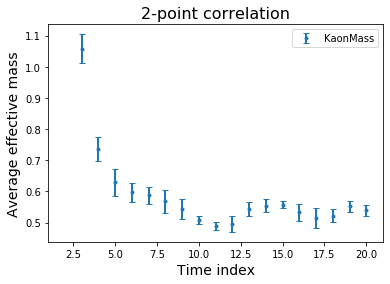

In [21]:
plt.xlim([1,21])
plt.errorbar(t[2:20],m[2:20],yerr=merr[2:20],fmt='.',capsize=3,elinewidth=2)
plt.legend(['KaonMass'])
# plt.plot(t,0.31*np.ones(64),'r--')
plt.xlabel('Time index',fontsize=14)
plt.ylabel('Average effective mass',fontsize=14)
plt.title('2-point correlation',fontsize=16)
plt.show()
plt.close()

# Jacknife Resampling

In [22]:
C2mat = np.tile(np.reshape(C2,(64,1)),(1,N_conf))
C2mat = C2mat * N_conf

In [23]:
C2iprime = (C2mat - C2i) / (N_conf - 1)
C2prime = np.mean(C2iprime,1)
C2errprime = np.std(C2iprime,axis=1)/math.sqrt(N_conf-1)
C2covprime = np.cov(C2iprime,rowvar=True,bias=True)

In [24]:
miprime = np.zeros((63,N_conf))
for row in range(0,63):
    for column in range(0,N_conf):
        miprime[row,column] = a0 * np.log(C2iprime[row,column]/C2iprime[row+1,column])
        
mprime = np.mean(miprime,1)
merrprime = np.std(miprime,axis=1)*math.sqrt(N_conf-1)
# print(mprime)
# print(merrprime)

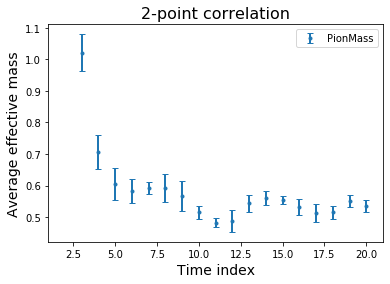

In [25]:
plt.xlim([1,21])
plt.errorbar(t[2:20],mprime[2:20],yerr=merrprime[2:20],fmt='.',capsize=3,elinewidth=2)
plt.legend(['PionMass'])
# plt.plot(t,0.31*np.ones(64),'r--')
plt.xlabel('Time index',fontsize=14)
plt.ylabel('Average effective mass',fontsize=14)
plt.title('2-point correlation',fontsize=16)
plt.show()
plt.close()

# Data Curve Fitting

In [26]:
import gvar as gv
import lsqfit

In [27]:
xmin = 4
xmax = 20
prior = {'c0':gv.gvar(0.02,0.5),'m0':gv.gvar(0.3,1.),'c1':gv.gvar(1.,100.),'deltam':gv.gvar(0.5,10.)}

In [28]:
xfit = np.arange(xmin,xmax)
yfit = gv.gvar(C2prime[xmin:xmax],C2errprime[xmin:xmax])
# yfit = gv.gvar(C2prime[xmin:xmax],np.sqrt(C2covprime[xmin:xmax,xmin:xmax].diagonal()))
# yfit = gv.gvar(C2prime[xmin:xmax],C2covprime[xmin:xmax,xmin:xmax])

In [29]:
def fit1state(x, p):
    ans = p['c0']*(np.exp(-x * p['m0'] / a0))
    return ans

fit1 = lsqfit.nonlinear_fit(data=(xfit,yfit),svdcut=1e-3,prior=prior,fcn=fit1state)
print(fit1)

Least Square Fit:
  chi2/dof [dof] = 4.3 [16]    Q = 1.6e-08    logGBF = 114.8

Parameters:
             c0   0.03601 (45)      [  0.02 (50) ]  
             m0    0.5391 (16)      [  0.3 (1.0) ]  
             c1        1 (100)      [    1 (100) ]  
         deltam     0.5 (10.0)      [ 0.5 (10.0) ]  

Settings:
  svdcut/n = 0.001/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 9/0.0)
  fitter = scipy_least_squares    method = trf



In [30]:
def fit2state(x, p):
    ans = p['c0']*(np.exp(-x * p['m0'] / a0))*(1+p['c1']*(np.exp(-x* p['deltam']/a0)))
    return ans

fit2 = lsqfit.nonlinear_fit(data=(xfit,yfit),svdcut=1e-3,prior=prior,fcn=fit2state)
print(fit2)

Least Square Fit:
  chi2/dof [dof] = 1.1 [16]    Q = 0.37    logGBF = 130.88

Parameters:
             c0   0.0322 (12)     [  0.02 (50) ]  
             m0   0.5271 (39)     [  0.3 (1.0) ]  
             c1     1.6 (1.0)     [    1 (100) ]  
         deltam     0.86 (30)     [ 0.5 (10.0) ]  

Settings:
  svdcut/n = 0.001/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 32/0.0)
  fitter = scipy_least_squares    method = trf

